In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn  as sns
import folium
from folium.plugins import HeatMap

In [13]:
df = pd.read_csv('/Users/darshdave/Documents/Projects/ORDER_FOOD_DELIVERY_REVIEW_PREDICTION/DATASET/onlinefoods.csv')

In [14]:
df.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [15]:
#Unnamed Unnamed: 12 has same value so we don't required it
df = df.drop('Unnamed: 12',axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [17]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

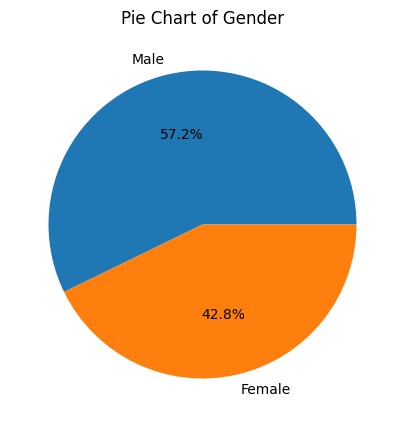

In [18]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Gender')
plt.show()

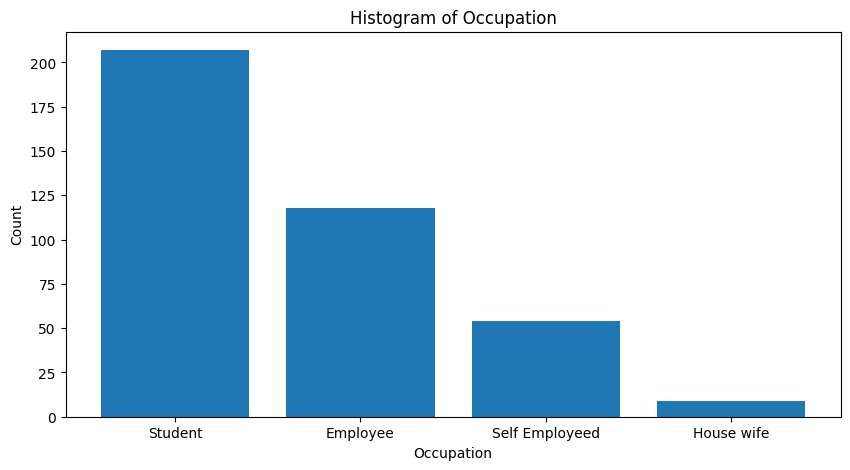

In [19]:
occupation_counts = df['Occupation'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(occupation_counts.index, occupation_counts.values)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Histogram of Occupation')
plt.show()

In [20]:
df[df['Gender']=="Female"]["Age"].mean()

24.41566265060241

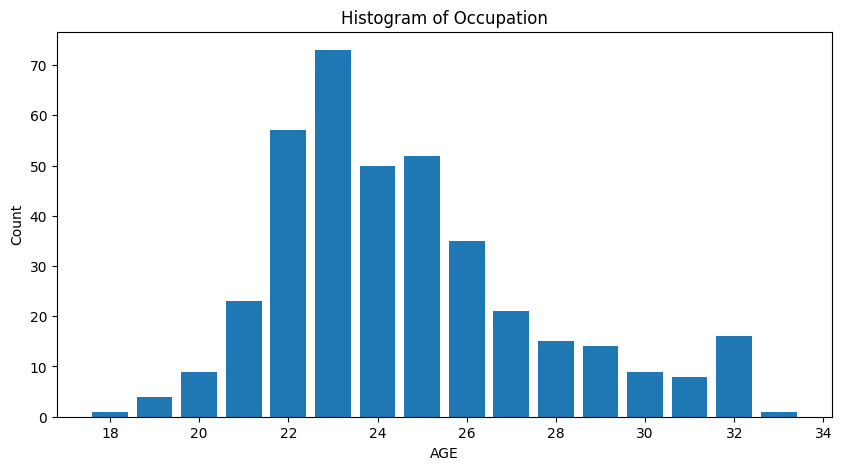

In [21]:
age_counts = df['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('Histogram of Occupation')
plt.show()

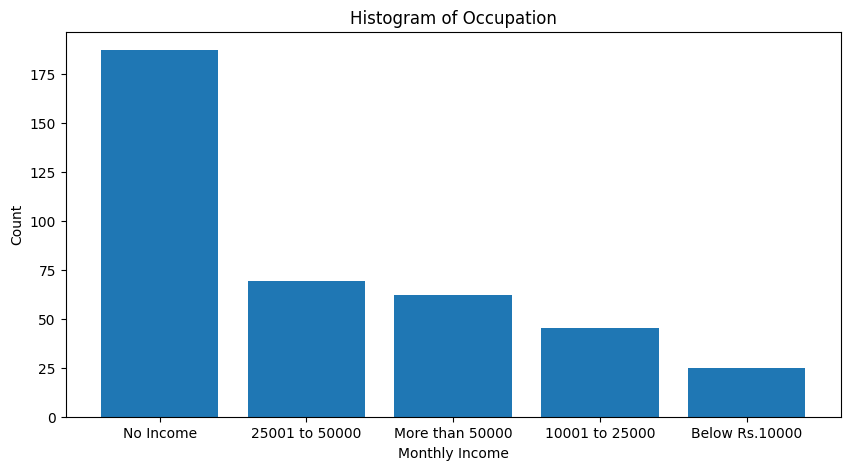

In [22]:
monthly_income_counts = df['Monthly Income'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(monthly_income_counts.index, monthly_income_counts.values)
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.title('Histogram of Occupation')
plt.show()

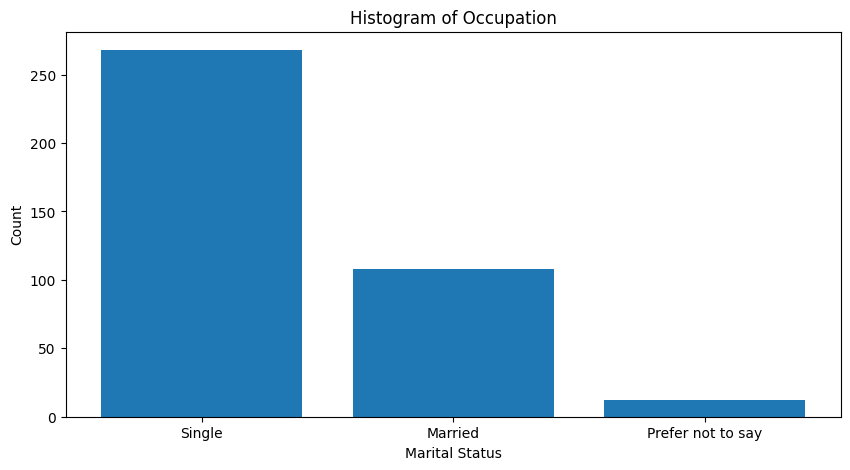

In [23]:
marital_counts = df['Marital Status'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(marital_counts.index, marital_counts.values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Histogram of Occupation')
plt.show()

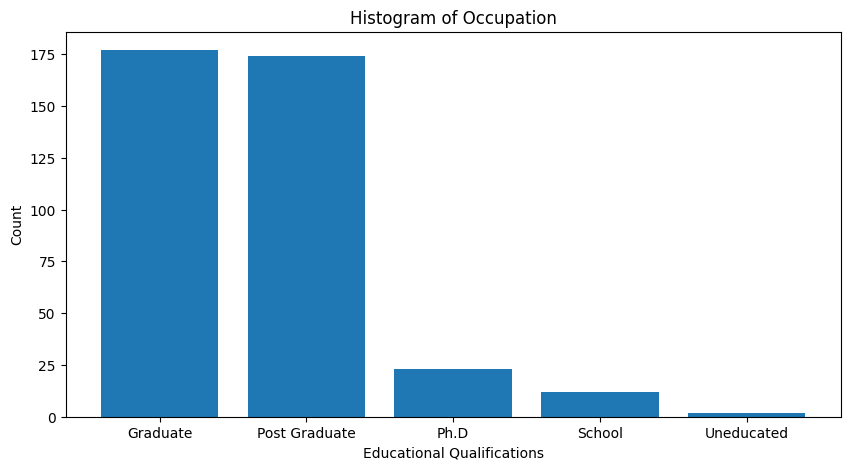

In [24]:
education_qualification_counts = df['Educational Qualifications'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(education_qualification_counts.index, education_qualification_counts.values)
plt.xlabel('Educational Qualifications')
plt.ylabel('Count')
plt.title('Histogram of Occupation')
plt.show()

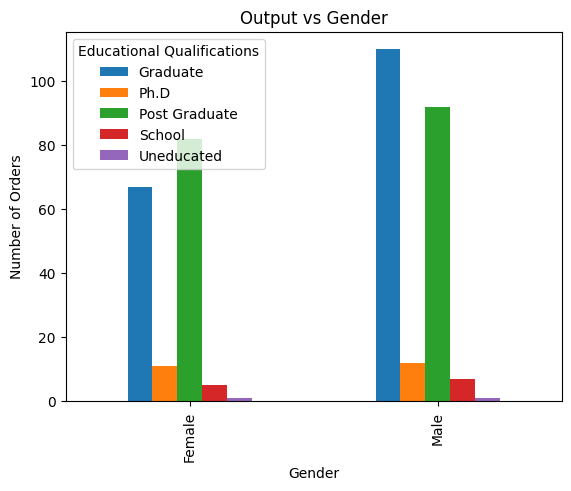

In [25]:
education_gender_counts = df.groupby(['Gender', 'Educational Qualifications']).size().unstack().fillna(0)

education_gender_counts.plot(kind='bar')


plt.xlabel('Gender')
plt.ylabel('Number of Orders')
plt.title('Output vs Gender')

plt.show()

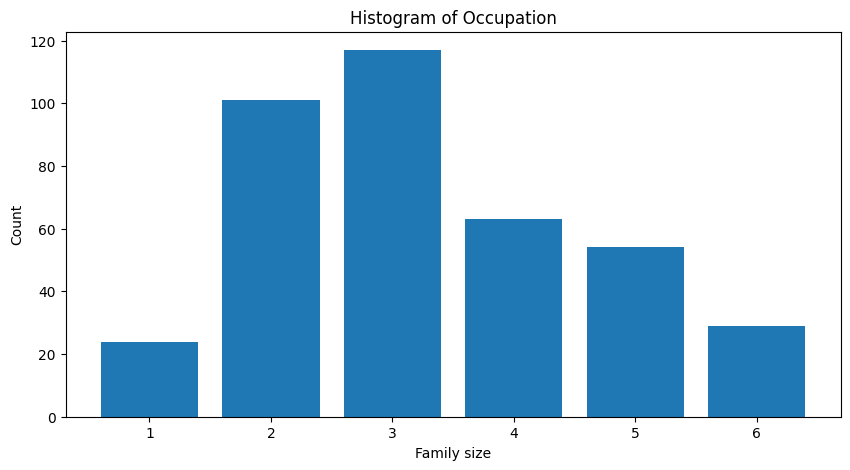

In [26]:
family_size_counts = df['Family size'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(family_size_counts.index, family_size_counts.values)
plt.xlabel('Family size')
plt.ylabel('Count')
plt.title('Histogram of Occupation')
plt.show()

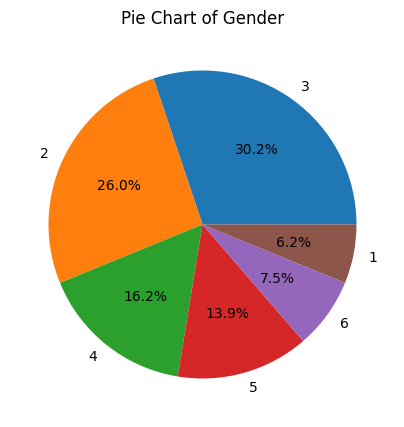

In [27]:
plt.figure(figsize=(5, 5))
plt.pie(family_size_counts, labels=family_size_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Gender')
plt.show()

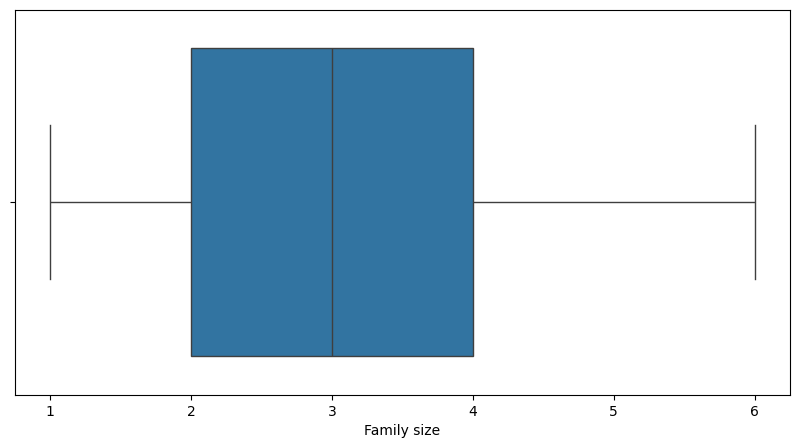

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Family size'])
plt.xlabel('Family size')
plt.show()

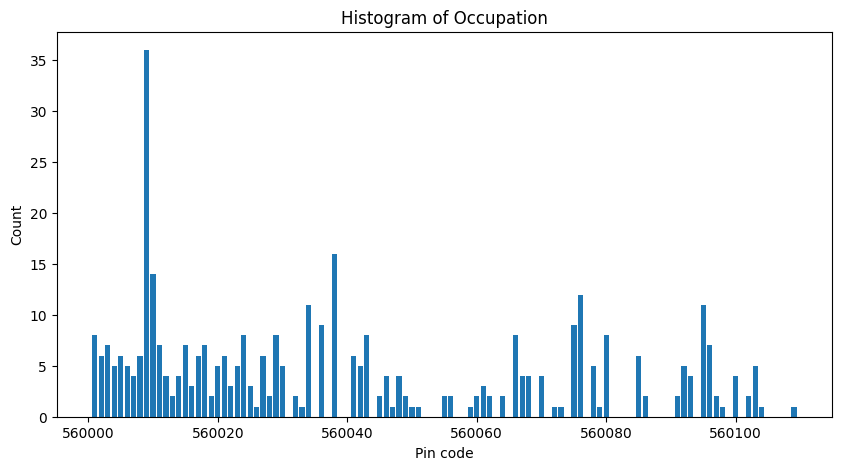

In [29]:
pincode_counts = df['Pin code'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(pincode_counts.index, pincode_counts.values)
plt.xlabel('Pin code')
plt.ylabel('Count')
plt.title('Histogram of Occupation')
plt.show()

In [30]:
pincode_counts = df['Pin code'].groupby(df['Pin code']).count().sort_values(ascending=False)
pincode_counts

Pin code
560009    36
560038    16
560010    14
560076    12
560034    11
          ..
560098     1
560026     1
560073     1
560104     1
560109     1
Name: Pin code, Length: 77, dtype: int64

In [31]:
df['Pin code'].nunique()

77

In [32]:
output_counts = df['Output'].groupby(df['Output']).count().sort_values(ascending=False)
output_counts

Output
Yes    301
No      87
Name: Output, dtype: int64

In [33]:
df['Output'].value_counts()

Output
Yes    301
No      87
Name: count, dtype: int64

In [37]:
map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Create a heatmap layer based on the latitude and longitude values
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map)

# Add markers for each data point
for index, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['Output']).add_to(map)

# Display the map
map

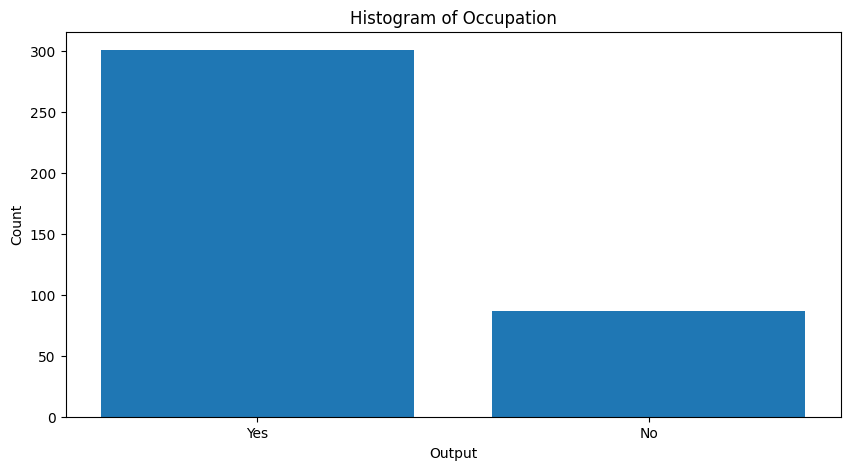

In [38]:
output_counts = df['Output'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(output_counts.index, output_counts.values)
plt.xlabel('Output')
plt.ylabel('Count')
plt.title('Histogram of Occupation')
plt.show()

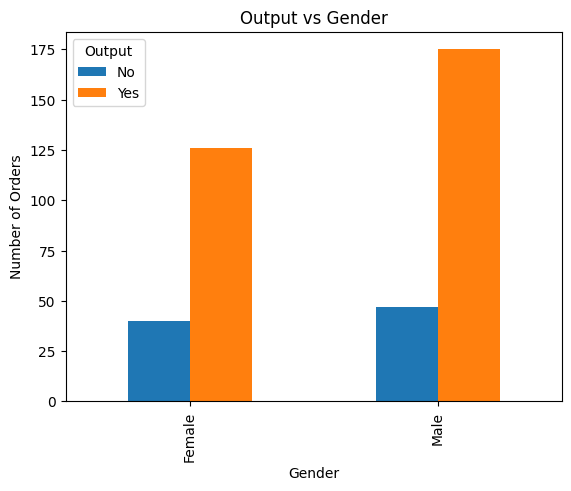

In [39]:
output_gender_counts = df.groupby(['Gender', 'Output']).size().unstack().fillna(0)

output_gender_counts.plot(kind='bar')


plt.xlabel('Gender')
plt.ylabel('Number of Orders')
plt.title('Output vs Gender')

plt.show()

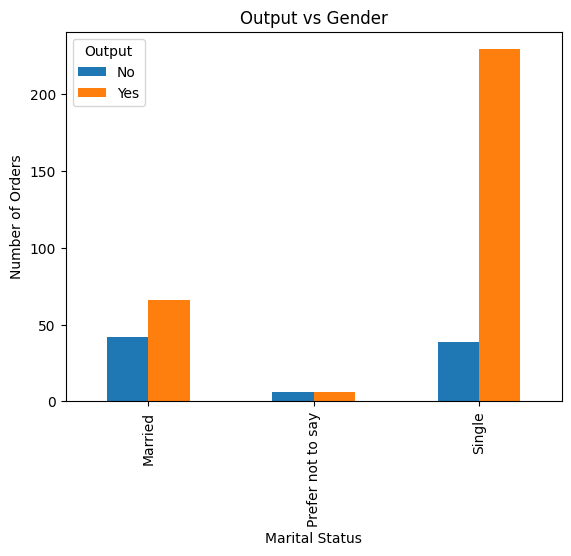

In [40]:
output_gender_counts = df.groupby(['Marital Status', 'Output']).size().unstack().fillna(0)

output_gender_counts.plot(kind='bar')


plt.xlabel('Marital Status')
plt.ylabel('Number of Orders')
plt.title('Output vs Gender')

plt.show()

In [41]:
feedback_counts = df['Feedback'].groupby(df['Feedback']).count().sort_values(ascending=False)
feedback_counts

Feedback
Positive     317
Negative      71
Name: Feedback, dtype: int64

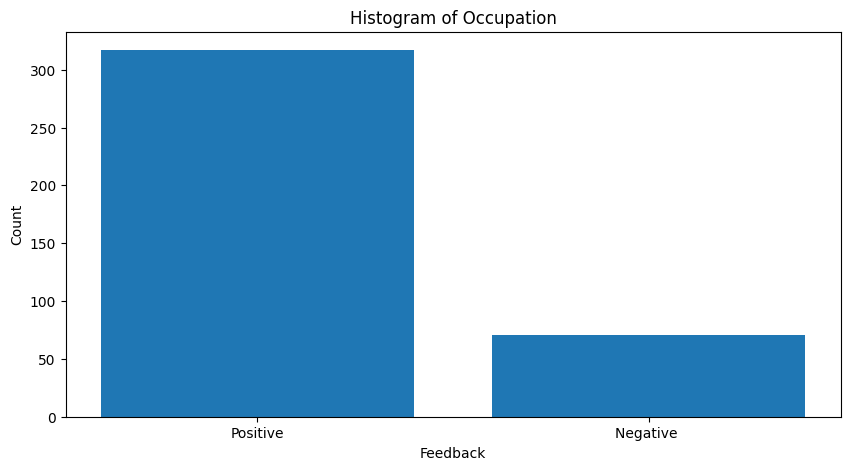

In [42]:
feedback_counts = df['Feedback'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(feedback_counts.index, feedback_counts.values)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Histogram of Occupation')
plt.show()

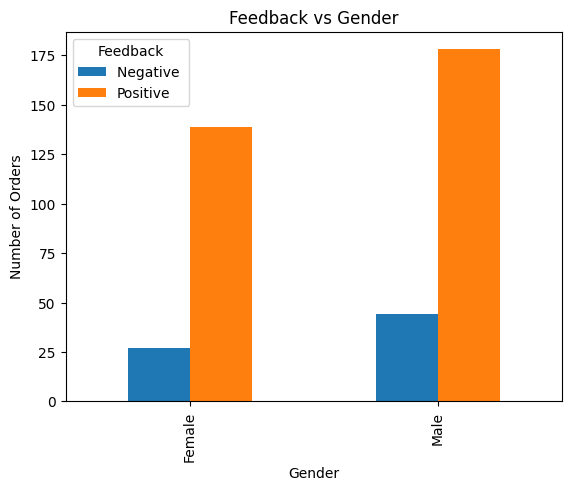

In [43]:
feedback_counts = df.groupby(['Gender', 'Feedback']).size().unstack().fillna(0)

feedback_counts.plot(kind='bar')


plt.xlabel('Gender')
plt.ylabel('Number of Orders')
plt.title('Feedback vs Gender')

plt.show()

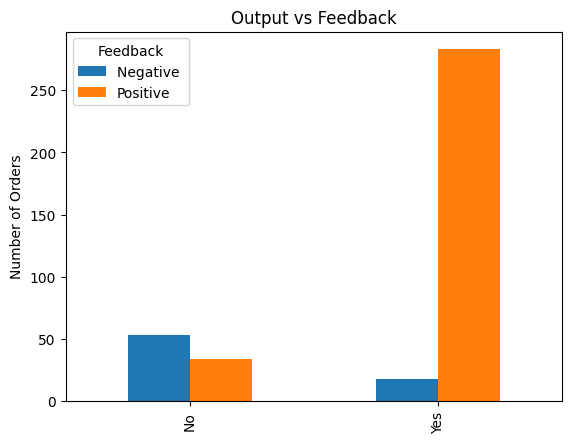

In [44]:
output_counts = df.groupby(['Output', 'Feedback']).size().unstack().fillna(0)

output_counts.plot(kind='bar')


plt.xlabel('')
plt.ylabel('Number of Orders')
plt.title('Output vs Feedback')

plt.show()